## CORE

In [1]:
!pip install fastcore fastai2 -q

     |████████████████████████████████| 194kB 10.8MB/s 


In [0]:
from fastcore.foundation import *
from fastai2.vision.all import *
import pathlib

In [0]:
@patch
def ls(x: pathlib.Path):
    return list(x.iterdir())

## Colab_setup

In [0]:
import os

from pathlib import Path
from google.colab import drive

In [0]:
def create_path(path):
    if not os.path.isdir(path):
        path.mkdir(parents=True, exist_ok=True)
    return path

In [5]:
from google.colab import drive
drive.mount('/content/drive')
root_dir = Path('/content/drive/My Drive')
base_path = create_path(root_dir/'Rakuten')
base_path

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Path('/content/drive/My Drive/Rakuten')

In [0]:
colab_path = Path('/content')

In [0]:
data_path = create_path(base_path/'dataset')

In [0]:
model_path = create_path(base_path/'models')

In [0]:
# shutil.rmtree(data_path)

## download data

In [0]:
# os.chdir(data_path)
# data_url = "'http://rakutendatachallenge.net/downloads/496da313-4b78-43e7-81bb-320e74670087/sigir-2020-ecomdc-release-phase1.tgz'"
# !wget {data_url} -O 'temp.tgz'

In [9]:
data_path.ls()

[Path('/content/drive/My Drive/Rakuten/dataset/._SIGIR-2020-EComDC-release'),
 Path('/content/drive/My Drive/Rakuten/dataset/SIGIR-2020-EComDC-release'),
 Path('/content/drive/My Drive/Rakuten/dataset/temp.tgz'),
 Path('/content/drive/My Drive/Rakuten/dataset/df_all.csv'),
 Path('/content/drive/My Drive/Rakuten/dataset/rand_files_sample_10000.npy')]

In [0]:
!tar -xzf '/content/drive/My Drive/Rakuten/dataset/temp.tgz' -C '/content/'

In [10]:
(colab_path/'SIGIR-2020-EComDC-release').ls()

[Path('/content/SIGIR-2020-EComDC-release/.DS_Store'),
 Path('/content/SIGIR-2020-EComDC-release/._.DS_Store'),
 Path('/content/SIGIR-2020-EComDC-release/data'),
 Path('/content/SIGIR-2020-EComDC-release/._image'),
 Path('/content/SIGIR-2020-EComDC-release/._data'),
 Path('/content/SIGIR-2020-EComDC-release/image')]

In [0]:
path = colab_path/'SIGIR-2020-EComDC-release'

In [0]:
# eval_url = "'http://rakutendatachallenge.net/downloads/496da313-4b78-43e7-81bb-320e74670087/eval_script.py'"
# !wget -q {eval_url}
# os.chdir(colab_path)

## EDA

As see in the competition paper

> The dataset consists of product titles,product descriptions,product images and their corresponding product type code



In [0]:
path = colab_path/'SIGIR-2020-EComDC-release'

In [13]:
(path/'data').ls()

[Path('/content/SIGIR-2020-EComDC-release/data/x_test_task1_phase1.tsv'),
 Path('/content/SIGIR-2020-EComDC-release/data/.DS_Store'),
 Path('/content/SIGIR-2020-EComDC-release/data/Y_train.tsv'),
 Path('/content/SIGIR-2020-EComDC-release/data/x_test_task2_phase1.tsv'),
 Path('/content/SIGIR-2020-EComDC-release/data/._x_test_task1_phase1.tsv'),
 Path('/content/SIGIR-2020-EComDC-release/data/._.DS_Store'),
 Path('/content/SIGIR-2020-EComDC-release/data/X_train.tsv'),
 Path('/content/SIGIR-2020-EComDC-release/data/catalog_english_taxonomy.tsv'),
 Path('/content/SIGIR-2020-EComDC-release/data/._Y_train.tsv'),
 Path('/content/SIGIR-2020-EComDC-release/data/._catalog_english_taxonomy.tsv'),
 Path('/content/SIGIR-2020-EComDC-release/data/._X_train.tsv'),
 Path('/content/SIGIR-2020-EComDC-release/data/._x_test_task2_phase1.tsv')]

In [14]:
x_train = pd.read_csv(path/'data/X_train.tsv', sep='\t'); x_train.head(2)

,Integer_id,Title,Description,Image_id,Product_id
0,0,Olivia: Personalisiertes Notizbuch / 150 Seiten / Punktraster / Ca Din A5 / Rosen-Design,NaN,1263597046,3804725264
1,1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L'art Et Son Marche Salon D'art Asiatique A Paris - Jacques Barrere - Francois Perrier - La Reforme Des Ventes Aux Encheres Publiques - Le Sna Fete Ses Cent Ans.,NaN,1008141237,436067568


In [15]:
y_train = pd.read_csv(path/'data/Y_train.tsv', sep='\t'); y_train.head(2)

,Integer_id,Image_id,Product_id,Prdtypecode
0,0,1263597046,3804725264,10
1,1,1008141237,436067568,2280


In [16]:
id2cat_df = pd.read_csv(path/'data/catalog_english_taxonomy.tsv', sep='\t'); id2cat_df.sample(2)

,Prdtypecode,Top level category
12,1302,Child
3,1160,Entertainment


In [17]:
id2cat_df['Prdtypecode'].unique()

array([1280, 1281, 1920, 1160,   10, 2060, 2705, 1300, 1940, 2582, 2583,
       1560, 1302, 2585, 1301, 1180, 2462,   40, 1320, 2220,   50,   60,
       2905, 2522, 2403, 2280, 1140])

In [18]:
x_train.shape, y_train.shape

((84916, 5), (84916, 4))

In [19]:
x_train.isna().sum(), y_train.isna().sum()

(Integer_id         0
 Title              0
 Description    29800
 Image_id           0
 Product_id         0
 dtype: int64, Integer_id     0
 Image_id       0
 Product_id     0
 Prdtypecode    0
 dtype: int64)

Merge the `x_train` and `y_train` on their `Image_id`

In [0]:
for data in [x_train, y_train]:
    data.drop(columns='Integer_id', inplace=True)

In [21]:
df_all = x_train.merge(y_train, on=['Image_id', 'Product_id']); df_all.sample(2)

,Title,Description,Image_id,Product_id,Prdtypecode
63494,Penn Ar Bed N° 64 : Les Diptéres Du Littoral La Loutre,NaN,935813765,61460033,2280
5551,Chargeur Et Cinq Batteries Li-Po Pièces De Rechange Pour Xs809 / Hc / Hw Quadcopter-Générique,Chargeur et cinq batteries Li-Po Pièces de rechange pour XS809 / HC / HW Quadcopter,1289811275,4089927630,1300


change the prdtype codes to the actual cat labels

In [0]:
id2lbl_dict={i: x for i, x in zip(id2cat_df.Prdtypecode.values, id2cat_df['Prdtypecode'].values)}

In [0]:
def id2lbl(id_):
    return id2lbl_dict[id_]

In [0]:
df_all['Prdlbl'] = df_all.Prdtypecode.apply(id2lbl)

Check if the individual images and products are unique

In [25]:
df_all.Image_id.nunique(), df_all.Product_id.nunique(), len(df_all)

(84916, 84916, 84916)

check the classes that are in the training set

In [29]:
print(df_all.Prdlbl.unique())
print(len(df_all.Prdlbl.unique())) # we have just 27 classes/prdtypecodes

[  10 2280   50 1280 2705 2522 2582 1560 1281 1920 2403 1140 2583 1180
 1300 2462 1160 2060   40   60 1320 1302 2220 2905 2585 1940 1301]
27


How many products are in each class?

In [30]:
{group: len(items) for group, items in df_all.groupby('Prdlbl').groups.items()}

{10: 3116,
 40: 2508,
 50: 1681,
 60: 832,
 1140: 2671,
 1160: 3953,
 1180: 764,
 1280: 4870,
 1281: 2070,
 1300: 5045,
 1301: 807,
 1302: 2491,
 1320: 3241,
 1560: 5073,
 1920: 4303,
 1940: 803,
 2060: 4993,
 2220: 824,
 2280: 4760,
 2403: 4774,
 2462: 1421,
 2522: 4989,
 2582: 2589,
 2583: 10209,
 2585: 2496,
 2705: 2761,
 2905: 872}

Add the path to each image to the `df_all`

In [31]:
len((path/'image/image_training').ls())

169832

Why? Some images in the folder start with `._` after untarring. These files are corrupt so we exclude them

In [32]:
files = get_image_files(path/'image/image_training', recurse=True); len(files)

84916

In [33]:
files

(#84916) [Path('/content/SIGIR-2020-EComDC-release/image/image_training/image_1279438181_product_4037930764.jpg'),Path('/content/SIGIR-2020-EComDC-release/image/image_training/image_1006411857_product_90455269.jpg'),Path('/content/SIGIR-2020-EComDC-release/image/image_training/image_976143775_product_275283722.jpg'),Path('/content/SIGIR-2020-EComDC-release/image/image_training/image_1283021114_product_4057772934.jpg'),Path('/content/SIGIR-2020-EComDC-release/image/image_training/image_1279915036_product_4042292752.jpg'),Path('/content/SIGIR-2020-EComDC-release/image/image_training/image_1119407367_product_1998121709.jpg'),Path('/content/SIGIR-2020-EComDC-release/image/image_training/image_1164498633_product_2786150089.jpg'),Path('/content/SIGIR-2020-EComDC-release/image/image_training/image_1180646245_product_2996505396.jpg'),Path('/content/SIGIR-2020-EComDC-release/image/image_training/image_1196087420_product_2663465505.jpg'),Path('/content/SIGIR-2020-EComDC-release/image/image_train

In [0]:
prdid2path_dict = dict()
pat = r'([0-9]+).jpg$'
for img_path in files:
    idx = re.search(pat, str(img_path)).group(0)
    # if int(idx[:-4]) == id_:
    prdid2path_dict[int(idx[:-4])] = img_path

In [0]:
def add_img_path(id_):
    return prdid2path_dict[id_]

In [0]:
df_all['image_path'] = df_all.Product_id.apply(add_img_path)

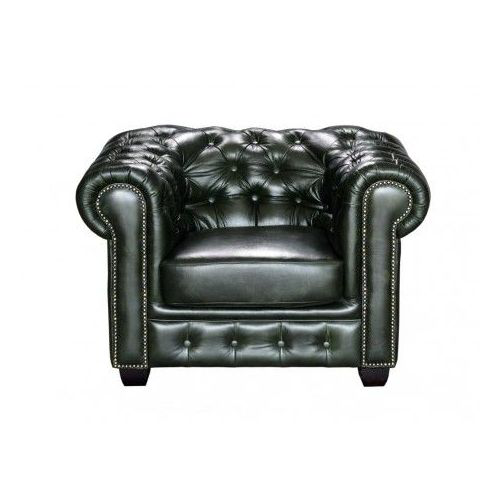

In [37]:
PILImage.create(df_all.image_path[11])

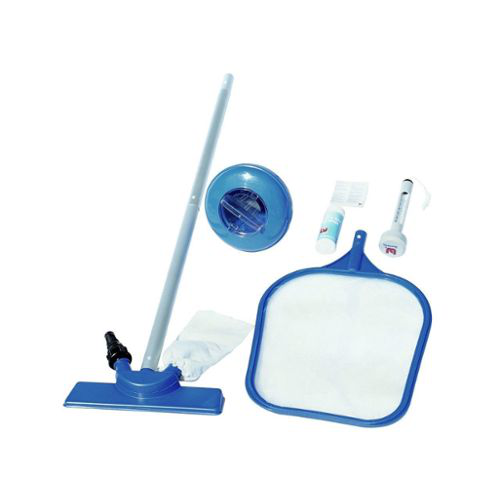

In [38]:
PILImage.create(df_all.image_path[3541])

In [0]:
# df_all.to_csv(data_path/'df_all.csv', index=False)

## Fin

In [40]:
df_all = pd.read_csv(data_path/'df_all.csv'); df_all.sample(1)

,Title,Description,Image_id,Product_id,Prdtypecode,Prdlbl,image_path
14802,Carré Potager Surélevé Gariguette,<p><br /> <strong>Carré potager surélevé GARIGUETTE en pin européen JARDIPOLYS</strong></p><br /><p><br /> Composé de 8 carrés de culture.</p><br /><p><br /> Dimensions (L) 120 x (lg) 60 x (H) 865 cm</p><br /><p><br /> (ép) 15 cm</p><br /><p><br /> Contenance: 135 L</p>,1024435044,543808617,2582,2582,/content/SIGIR-2020-EComDC-release/image/image_training/image_1024435044_product_543808617.jpg


## Datasets and DataLoaders

In [0]:
def seed_everything(seed=42):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    
seed_everything()

In [42]:
files = get_image_files(path/'image/image_training', recurse=True); len(files)

84916

I'll resize the images from 500px to 224px using LANCZOZ interpolation(tested and found it works better than BILINEAR, BICUBIC and NEAREST)

In [0]:
rand_files_sample = random.sample(files, k=10000)

In [0]:
np.save(str(data_path/'rand_files_sample_10000.npy'), rand_files_sample)

Load the saved files by running cell below

In [0]:
rand_files_sample = np.load(str(data_path/'rand_files_sample_10000.npy'), allow_pickle=True)

In [0]:
def pre_process_image(path, save_path = 'images_224', save_dir=colab_path, size=(224, 224)):
    image_dir = create_path(save_dir/save_path)
    im = Image.open(path).resize((size), resample=Image.LANCZOS)
    im.save(image_dir/f'{str(path.name)}', quality=95)
    return Path(image_dir/f'{str(path.name)}', quality=95)

In [0]:
# cleanup
# shutil.rmtree('/content/images_224')

In [0]:
resized_files = [pre_process_image(path) for path in rand_files_sample]

In [0]:
def path2name(path_):
    root = '/content/SIGIR-2020-EComDC-release/image/image_training/'
    return df_all.loc[df_all.image_path == (root + str(path_.name))].Prdlbl.values[0]

def get_files(noop):
    # return files
    # select 1000 random images from the dataset
    return resized_files

In [0]:
# item_tfms = [Resize(460, method=ResizeMethod.Squish)]
# batch_tfms = [RandomResizedCrop(224, min_scale=0.8, resamples=(Image.LANCZOS, Image.LANCZOS)), *aug_transforms(max_zoom=0., max_warp=0., min_scale=0.)]
batch_tfms = [*aug_transforms(max_zoom=0., max_warp=0., min_scale=0.)]

In [0]:
splits = RandomSplitter(seed=42)(resized_files)

In [0]:
np.save(str(data_path/'rand_splits_10000_baseline.npy'), splits)

In [0]:
splits = np.load(str(data_path/'rand_splits_10000_baseline.npy'), allow_pickle=True)
splits = L(splits[0], splits[1])

In [0]:
def custom_rand_splitter(noop):
    return splits

In [0]:
data_ = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_files,
                 splitter=custom_rand_splitter,
                 get_y=path2name,
                #  item_tfms=item_tfms,
                 batch_tfms=batch_tfms
                 )

In [0]:
data_.summary(resized_files)

In [0]:
data = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items=get_files,
                 splitter=RandomSplitter(seed=42),
                 get_y=path2name,
                #  item_tfms=item_tfms,
                 batch_tfms=batch_tfms
                 )

In [0]:
# data.summary(files)

In [0]:
dls = data.dataloaders(resized_files, bs=8)

In [113]:
dls.splits[0]

(#2) [[5886, 911, 6853, 2031, 7391, 5680, 4363, 1262, 7372, 3804, 4264, 4246, 1914, 9467, 501, 1733, 2872, 6424, 6534, 2740, 6490, 2504, 1651, 3243, 2716, 7300, 349, 1206, 707, 365, 7508, 9549, 9926, 4986, 7506, 2923, 8269, 2910, 1528, 2423, 3516, 2766, 1097, 472, 2627, 7377, 9417, 4063, 4166, 4968, 2245, 8940, 6389, 5113, 4822, 9709, 5441, 7519, 6559, 4780, 292, 9519, 4148, 5825, 9202, 1776, 4531, 337, 2949, 6194, 326, 3016, 2991, 8647, 2350, 6698, 5639, 6141, 8764, 1172, 8496, 7500, 274, 6033, 8956, 1402, 5043, 6050, 2791, 1772, 2413, 5683, 3641, 3889, 8630, 2985, 5465, 4117, 6431, 3024, 3794, 3825, 4870, 7621, 6151, 3867, 9686, 6739, 6526, 1204, 193, 5169, 1410, 226, 5326, 2125, 1030, 7367, 227, 6699, 8047, 1457, 597, 8952, 1845, 87, 9056, 1541, 6838, 9702, 6484, 3667, 3469, 2061, 816, 9380, 8917, 5302, 2761, 3169, 7487, 2570, 6789, 6468, 8760, 1546, 5086, 3608, 6073, 1695, 4824, 6809, 2696, 4963, 7801, 8920, 6071, 769, 1337, 245, 5260, 9276, 4512, 125, 9905, 2594, 2110, 1261, 8405,

In [52]:
dls.vocab

(#27) [10,40,50,60,1140,1160,1180,1280,1281,1300...]

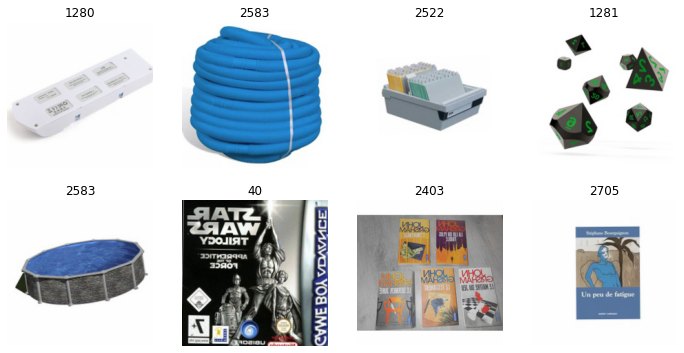

In [53]:
dls.show_batch()

## Model

In [0]:
from sklearn.metrics import f1_score
SORT_TSV_COL = "Integer_id"
TASK1_EVAL_COL = "Prdtypecode"
TASK2_EVAL_COL = "Image_id"

TASK1_PHASE1_PRED_FILENAME = "y_test_task1_phase1_pred.tsv"
TASK2_PHASE1_PRED_FILENAME = "y_test_task2_phase1_pred.tsv"
TASK1_PHASE2_PRED_FILENAME = "y_test_task1_phase2_pred.tsv"
TASK2_PHASE2_PRED_FILENAME = "y_test_task2_phase2_pred.tsv"

#Training Evaluation
def macro_f1_score(y_pred, y_test):
    score = f1_score(y_test, y_pred.argmax(-1), average="macro")
    return score

# Task evaluation
def evaluate_task_1(y_pred, y_test):
    y_test_array = np.array(y_pred[TASK1_EVAL_COL])
    y_pred_array = np.array(y_test[TASK1_EVAL_COL])

    # score = f1_score(y_test, y_pred.argmax(-1), average="macro")
    score = f1_score(y_test_array, y_pred_array, average="macro")

    return score

def evaluate_task_2(y_pred, y_test):
    y_test_array = np.array(y_pred[TASK2_EVAL_COL])
    y_pred_array = np.array(y_test[TASK2_EVAL_COL])
    
    score = accuracy_score(y_test_array, y_pred_array)
    
    return score

def evaluate(team_id):
    # Loading the ground truth data for Task 1 and 2 of phase 1
    y_test_task1 = pd.read_table("{}/{}".format(GROUND_TRUTH_DIR, TASK1_PHASE1_TEST_FILENAME))
    y_test_task2 = pd.read_table("{}/{}".format(GROUND_TRUTH_DIR, TASK2_PHASE1_TEST_FILENAME))

    score_task1, score_task2 = None, None

    # This part of the script needs to be modifies based on the setup.
    try:
        y_pred_task1 = pd.read_table("{}/{}-{}".format(UPLOAD_DIR,team_id,TASK1_PHASE1_PRED_FILENAME)).sort_values(SORT_TSV_COL)
        score_task1 = evaluate_task_1(y_pred_task1, y_test_task1)
    except:
        pass #probably should do some smart sensing of what is wrong here

    try:
        y_pred_task2 = pd.read_table("{}/{}-{}".format(UPLOAD_DIR,team_id,TASK2_PHASE1_PRED_FILENAME)).sort_values(SORT_TSV_COL)
        score_task2 = evaluate_task_2(y_pred_task2, y_test_task2)
    except:
        pass

    return score_task1, score_task2

The baseline model will be a Resnet50 that takes in the image and splits out a category

In [0]:
learn = cnn_learner(dls, resnet50, metrics=[accuracy, AccumMetric(macro_f1_score, flatten=False)])

SuggestedLRs(lr_min=7.585775847473997e-08, lr_steep=6.309573450380412e-07)

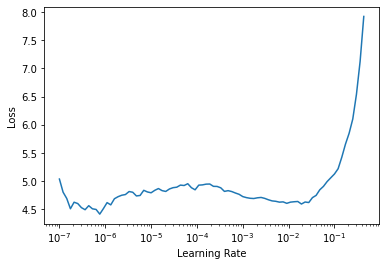

In [56]:
learn.lr_find()

In [57]:
import gc; gc.collect()

9233

In [58]:
learn.fit_one_cycle(6, 3e-03)

epoch,train_loss,valid_loss,accuracy,macro_f1_score,time
0,3.351821,2.462438,0.320500,0.207239,01:45
1,2.975953,2.388878,0.308000,0.207061,01:43
2,2.630440,2.362393,0.324000,0.201328,01:43
3,2.496532,2.092347,0.399500,0.269878,01:43
4,2.437878,2.043884,0.419000,0.298096,01:43
5,2.304947,2.029711,0.425500,0.309312,01:43


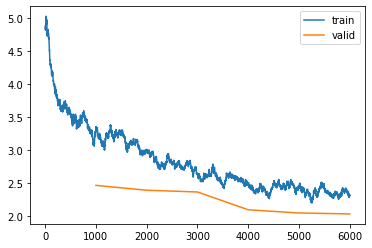

In [59]:
learn.recorder.plot_loss()

In [0]:
learn.unfreeze()

SuggestedLRs(lr_min=1.9054607491852948e-07, lr_steep=6.309573450380412e-07)

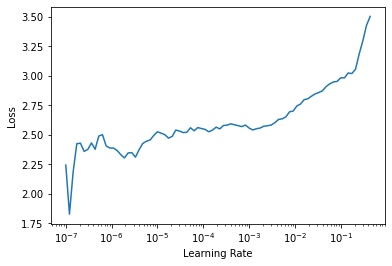

In [61]:
learn.lr_find()

In [63]:
learn.fit_one_cycle(6, slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,accuracy,macro_f1_score,time
0,2.212663,1.958842,0.439000,0.322719,01:54
1,2.324859,2.005030,0.426000,0.316029,01:52
2,2.303204,1.951175,0.439500,0.328615,01:52
3,2.189621,1.930098,0.446500,0.338044,01:52
4,2.129242,1.867490,0.458500,0.346594,01:51
5,2.264259,1.920893,0.448500,0.335015,01:51


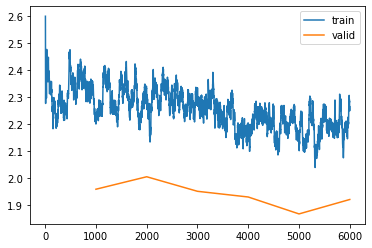

In [64]:
learn.recorder.plot_loss()

In [65]:
learn.fit_one_cycle(6, 1e-4)

epoch,train_loss,valid_loss,accuracy,macro_f1_score,time
0,2.360216,1.990631,0.417500,0.306086,01:52
1,2.468433,2.102358,0.388000,0.273842,01:52
2,2.268882,2.010095,0.407500,0.284218,01:51
3,2.238147,1.941846,0.437000,0.312080,01:51
4,2.070589,1.794611,0.494000,0.384012,01:51
5,2.085576,1.864104,0.466000,0.352085,01:51


In [0]:
learn.save(model_path/'head_10000_baseline')

In [67]:
model_path.ls()

[Path('/content/drive/My Drive/Rakuten/models/head_10000_baseline.pth')]

In [0]:
learn = learn.load(model_path/'head_10000_baseline')

In [69]:
interp = ClassificationInterpretation.from_learner(learn)

In [70]:
interp.most_confused()

[(10, 2705, 45),
 (2403, 2280, 39),
 (10, 2280, 25),
 (2585, 2583, 21),
 (1300, 2583, 18),
 (1280, 1300, 17),
 (1320, 2583, 17),
 (1560, 2583, 17),
 (2522, 2583, 16),
 (2060, 2583, 15),
 (50, 2583, 14),
 (1302, 1280, 14),
 (2582, 2583, 14),
 (1302, 2583, 12),
 (40, 2280, 11),
 (1280, 2280, 11),
 (1280, 2583, 11),
 (1281, 2280, 11),
 (1140, 2280, 10),
 (1280, 1140, 10),
 (1320, 1560, 10),
 (1560, 2060, 10),
 (1920, 1560, 10),
 (2060, 1280, 10),
 (2403, 2522, 10),
 (2403, 2705, 10),
 (50, 1300, 9),
 (1281, 1280, 9),
 (1560, 1920, 9),
 (2522, 2280, 9),
 (2582, 1560, 9),
 (2705, 2280, 9),
 (40, 1160, 8),
 (1300, 1302, 8),
 (1302, 1300, 8),
 (2060, 1560, 8),
 (2060, 1920, 8),
 (2220, 2583, 8),
 (1281, 2522, 7),
 (1320, 1280, 7),
 (1560, 2522, 7),
 (2060, 2522, 7),
 (2220, 1280, 7),
 (2522, 2705, 7),
 (2583, 2522, 7),
 (2905, 2705, 7),
 (1920, 2522, 6),
 (2060, 1300, 6),
 (2403, 10, 6),
 (2462, 1160, 6),
 (2522, 1302, 6),
 (2583, 1560, 6),
 (2585, 1300, 6),
 (2585, 1560, 6),
 (2585, 2522, 6)

In [0]:
id2prdname_dict={i: x for i, x in zip(id2cat_df.Prdtypecode.values, id2cat_df['Top level category'].values)}

In [82]:
id2prdname_dict[1180]

'Entertainment'

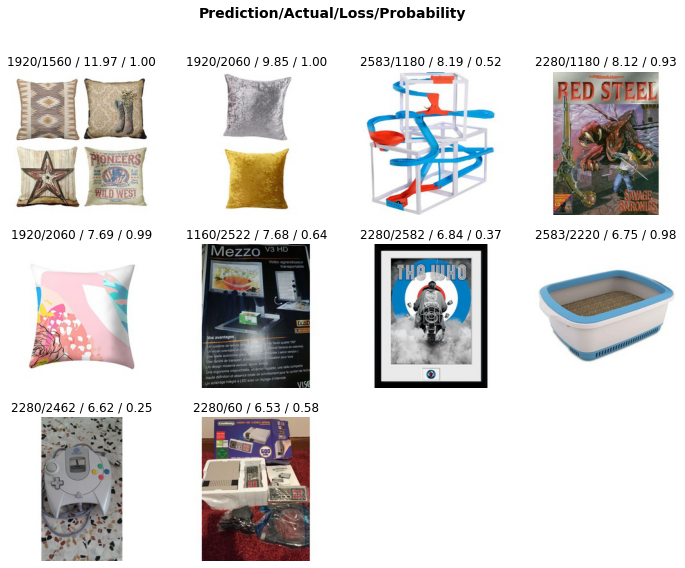

In [72]:
interp.plot_top_losses(k=10)

## TESTING/Inference. Phase1

In [83]:
test_df = pd.read_csv(colab_path/'SIGIR-2020-EComDC-release/data/x_test_task1_phase1.tsv', sep='\t'); test_df.head()

,Integer_id,Title,Description,Image_id,Product_id
0,0,Jeep Police - Gevarm-Gevarm,NaN,1193217616,3136702026
1,1,Court Joyeux Noël En Peluche Taie Sofa Set Pad Décoration 18x18 Pouces Pillow Case 28537,Joyeux Noël en peluche court Taie Sofa Set Pad Décoration 18x18 pouces Spécification: Matériel: style court peluche: Taille de mode (approx.): 45x45cm La taille peut avoir un écart de 0.5-2cm en raison de produit par date. Entretien: Lavable à la main ou lavage à l&#39;eau froide au cycle délicat. Ne pas utiliser l&#39;eau de Javel. Fermeture à glissière cachée. Insérer est vendu séparément Il peut être utilisé pour décorer le salon faire paraître à la maison chaleur plus confortable. Remarque: S&#39;il vous plaît permettre erreur mineure en raison de la mesure manuelle. En raison de la di...,1323615566,4231863665
2,2,Sauna infrarouge Largo - 170 x 105 x 190 - Pin blanc,Dimensions : 150x105x190 cm ou 170x105x190 cm //// Nombre de places : 2 - 3 places assises //// Extérieur : Au choix : érable ou pin blanc ou cèdre rouge //// Intérieur : Au choix : érable ou pin blanc ou cèdre rouge //// Verre : Verre trempé 8-10 mm //// Température ajustable : Oui //// Contrôles et réglages : Panneau de commande tactile GD530 //// Multimédia : Radio station à mémoire avec connexion CD //// Poêle : Conduite chauffante //// Lumières : Lampe à lumière colorée Panneau en bois rétroéclairé.,1158121321,2695198357
3,3,BAGUE POUR LAME SOUS-SOLEUSE G. ET D.,NaN,1096607258,1657064583
4,4,Carnet De Notes Bloc-Notes Cahierindian Squelette Flamen Pr¿º Tre Sacrifice Totem Taustration Sch¿¿Ma Les Carnets De Travail Classique Sur Support Papier Cadeau Tissu,Taille: En format A5 (144 cm x 21 cm) Caract¿¿ristique: -Excellente durabilit¿¿ avec couverture solide design. 96 pages jaune pale (recto et verso) -Texture de papier de haute qualit¿¿: ¿¿crire facilement sur et assez ¿¿paisse.,1303625028,4159071068


In [0]:
# all images in test set
test_img_path = colab_path/'SIGIR-2020-EComDC-release/image/image_test'

In [85]:
test_files = get_image_files(test_img_path); len(test_files)

1381

In [86]:
test_df.shape

(937, 5)

In [0]:
test_prdid2path_dict = dict()
pat = r'([0-9]+).jpg$'
for img_path in test_files:
    idx = re.search(pat, str(img_path)).group(0)
    # if int(idx[:-4]) == id_:
    test_prdid2path_dict[int(idx[:-4])] = img_path

In [0]:
# test_prdid2path_dict

In [0]:
def add_img_path(id_):
    return test_prdid2path_dict[id_]

In [0]:
# add_img_path(test_df.Product_id[0])

In [0]:
test_df['image_path'] = test_df.Product_id.apply(add_img_path)

In [0]:
test_dl = learn.dls.test_dl(test_items=test_df.image_path.values)

In [94]:
test_dl.one_batch()[0].shape #because valid bs == 8

torch.Size([8, 3, 500, 500])

In [95]:
preds = learn.get_preds(dl=test_dl, with_decoded=True)

In [0]:
sub_df = test_df.copy()

In [0]:
sub_df.drop(['Title', 'Description', 'image_path'], axis=1, inplace=True)

In [0]:
pred2vocab = {v: i for i,v in learn.dls.vocab.o2i.items()}

In [0]:
sub_df['Prdtypecode'] = list(map(lambda x:pred2vocab[x], preds[2].numpy()))

In [108]:
sub_df.head()

,Integer_id,Image_id,Product_id,Prdtypecode
0,0,1193217616,3136702026,2583
1,1,1323615566,4231863665,1920
2,2,1158121321,2695198357,2583
3,3,1096607258,1657064583,2585
4,4,1303625028,4159071068,2522


In [0]:
sub_df.to_csv(data_path/'submission_baseline_10000_score_38.4.csv')